In [4]:
# GUSTAVO ARTHUR HAERTHEL & GUSTAVO RICHARD VOSS
from google.colab import files
uploaded = files.upload()  # Carrega o arquivo Excel para o Colab
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os

Saving scientometrics.csv to scientometrics.csv


In [5]:
def create_graph_from_csv(file_path, column_node1, column_node2):
    max_edges = float('inf')  # Sem limite de arestas
    count = 0

    # Ler o arquivo CSV
    df = pd.read_csv(file_path, encoding="utf-8", sep=',')

    # Verificar se as colunas existem
    if column_node1 not in df.columns or column_node2 not in df.columns:
        raise ValueError(f"As colunas '{column_node1}' ou '{column_node2}' não foram encontradas no arquivo CSV.")

    # Criar um grafo vazio
    return nx.from_pandas_edgelist(df, source=column_node1, target=column_node2)

In [6]:
# Gerando grafos
deezer_graph = create_graph_from_csv("deezer_europe_edges.csv", "node_1", "node_2")
print(deezer_graph)
lastfm_graph = create_graph_from_csv("lastfm_asia_edges.csv", "node_1", "node_2")
print(lastfm_graph)

Graph with 28281 nodes and 92752 edges
Graph with 7624 nodes and 27806 edges


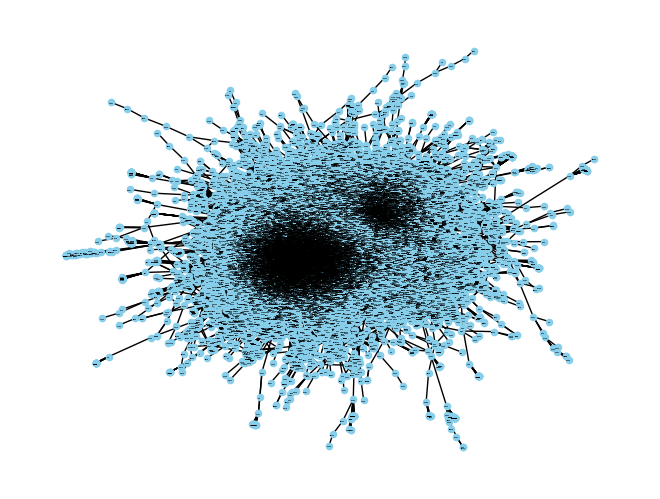

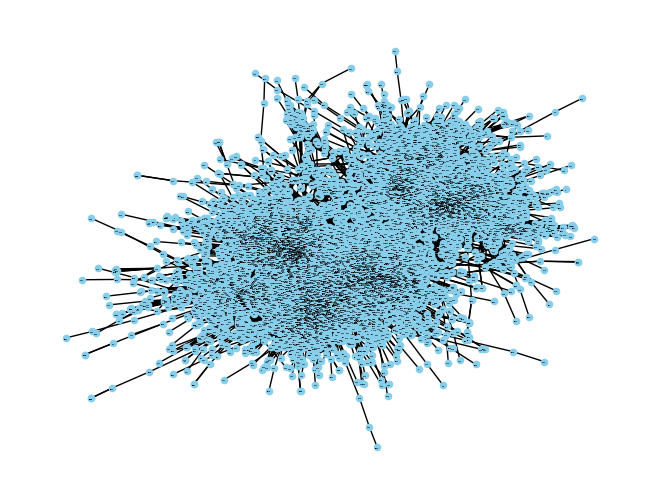

In [ ]:
#1a

# Desenhar o grafo
nx.draw(deezer_graph, with_labels=True, node_color='skyblue', node_size=20, font_size=1, font_color='black', font_weight='bold')
# Exibir o grafo
plt.show()

nx.draw(lastfm_graph, with_labels=True, node_color='skyblue', node_size=20, font_size=1, font_color='black', font_weight='bold')
plt.show()

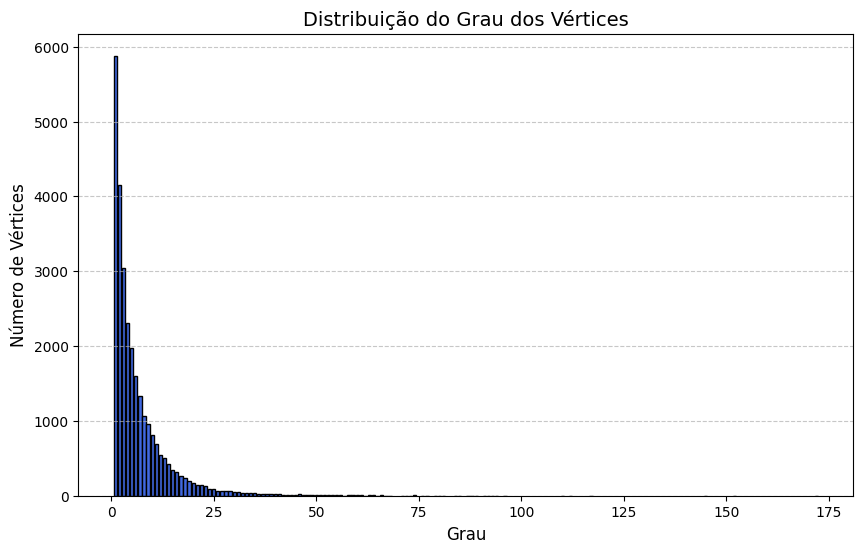

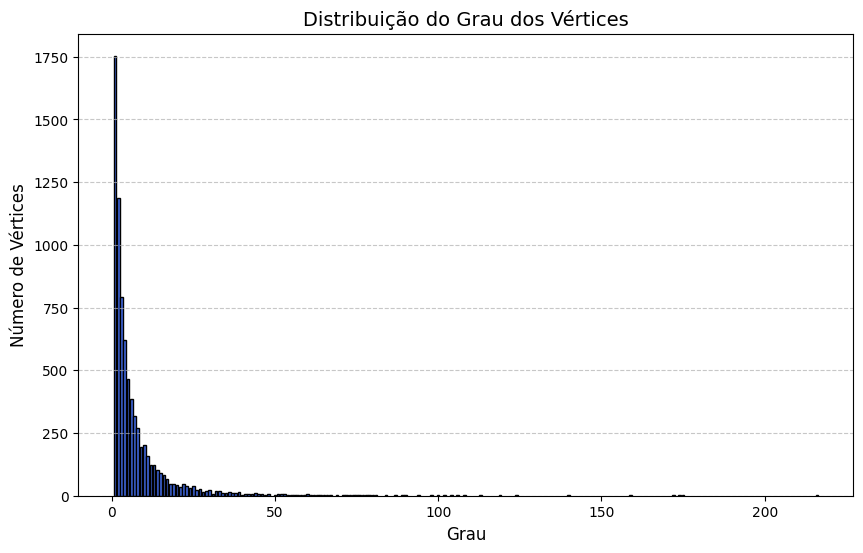

O grau médio do grafo deezer é: 6.56
O grau médio do grafo lastfm é: 7.29


In [ ]:
#1b

def show_distribution_graph(degree_count):
  plt.figure(figsize=(10, 6))
  plt.bar(degree_count.index, degree_count.values, color='royalBlue', edgecolor='black')
  plt.title("Distribuição do Grau dos Vértices", fontsize=14)
  plt.xlabel("Grau", fontsize=12)
  plt.ylabel("Número de Vértices", fontsize=12)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()


# Calcular a distribuição do grau dos vértices do deezer
deezer_degree_sequence = [degree for node, degree in deezer_graph.degree()]
deezer_degree_count = pd.Series(deezer_degree_sequence).value_counts().sort_index()

# Calcular a distribuição do grau dos vértices do lastfm
lastfm_degree_sequence = [degree for node, degree in lastfm_graph.degree()]
lastfm_degree_count = pd.Series(lastfm_degree_sequence).value_counts().sort_index()

# Grau médio do grafo deezer
deezer_average_degree = sum(deezer_degree_sequence) / len(deezer_graph.nodes()) if deezer_degree_sequence else 0

# Grau médio do grafo lasfm
lastfm_average_degree = sum(lastfm_degree_sequence) / len(lastfm_graph.nodes()) if lastfm_degree_sequence else 0

# Plotar a distribuição do grau
show_distribution_graph(deezer_degree_count)
show_distribution_graph(lastfm_degree_count)


# Exibir o grau médio do grafo
print(f"O grau médio do grafo deezer é: {deezer_average_degree:.2f}")
print(f"O grau médio do grafo lastfm é: {lastfm_average_degree:.2f}")


In [7]:
#1c/d

def show_distribution_graph_components(num_components):
  if num_components > 1:

    # Criar o gráfico da distribuição do tamanho dos componentes
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, max(num_components) + 1), sorted(num_components, reverse=True), color='green', edgecolor='black')
    plt.title("Distribuição do Tamanho dos Componentes Conectados", fontsize=14)
    plt.xlabel("Componente (ordenado por tamanho)", fontsize=12)
    plt.ylabel("Tamanho do Componente", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
  else:
      print("O grafo possui apenas um componente. Não é necessário plotar a distribuição.")


# Calcular e exibir o número de componentes conectados
num_components = nx.number_connected_components(deezer_graph)
print(f"O número de componentes conectados no grafo deezer é: {num_components}")
show_distribution_graph_components(num_components)


num_components = nx.number_connected_components(lastfm_graph)
print(f"O número de componentes conectados no grafo lastfm é: {num_components}")
show_distribution_graph_components(num_components)


O número de componentes conectados no grafo deezer é: 1
O grafo possui apenas um componente. Não é necessário plotar a distribuição.
O número de componentes conectados no grafo lastfm é: 1
O grafo possui apenas um componente. Não é necessário plotar a distribuição.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def analyze_graph(graph, graph_name):
    # Garantir que o grafo seja conexo
    if not nx.is_connected(graph):
        largest_component = max(nx.connected_components(graph), key=len)
        graph = graph.subgraph(largest_component).copy()

    # Separar as arestas em pares e ímpares com base nos índices
    edges = list(graph.edges(data=True))
    even_edges = edges[::2]  # Arestas com índices pares
    odd_edges = edges[1::2]  # Arestas com índices ímpares

    # Criar subgrafos para pares e ímpares
    even_graph = nx.Graph()
    even_graph.add_edges_from(even_edges)

    odd_graph = nx.Graph()
    odd_graph.add_edges_from(odd_edges)

    # Função auxiliar para análise de um subgrafo
    def analyze_subgraph(subgraph, label):
        # Garantir que o subgrafo seja conexo
        if not nx.is_connected(subgraph):
            largest_component = max(nx.connected_components(subgraph), key=len)
            subgraph = subgraph.subgraph(largest_component).copy()

        # Calcular todas as distâncias entre pares de vértices
        distances = dict(nx.all_pairs_shortest_path_length(subgraph))

        # Converter para lista de distâncias
        dist_values = []
        for source, target_distances in distances.items():
            dist_values.extend(target_distances.values())

        # Calcular a distância média
        avg_distance = sum(dist_values) / len(dist_values)
        print(f"Distância média ({label}): {avg_distance:.2f}")

        # Calcular a distribuição das distâncias
        dist_freq = {}
        for d in dist_values:
            dist_freq[d] = dist_freq.get(d, 0) + 1

        # Plotar a distribuição das distâncias
        plt.bar(dist_freq.keys(), dist_freq.values(), color='blue', alpha=0.7)
        plt.xlabel('Distância')
        plt.ylabel('Frequência')
        plt.title(f'Distribuição das Distâncias ({label})')
        plt.show()

        return avg_distance

    # Analisar subgrafos e somar os resultados
    avg_even = analyze_subgraph(even_graph, f"{graph_name} (Arestas Pares)")
    avg_odd = analyze_subgraph(odd_graph, f"{graph_name} (Arestas Ímpares)")

    # Exibir a soma das distâncias médias
    total_avg = avg_even + avg_odd
    print(f"Soma das distâncias médias ({graph_name}): {total_avg:.2f}")

# Analisar os grafos
analyze_graph(deezer_graph, "Deezer Europe")
analyze_graph(lastfm_graph, "LastFM Asia")


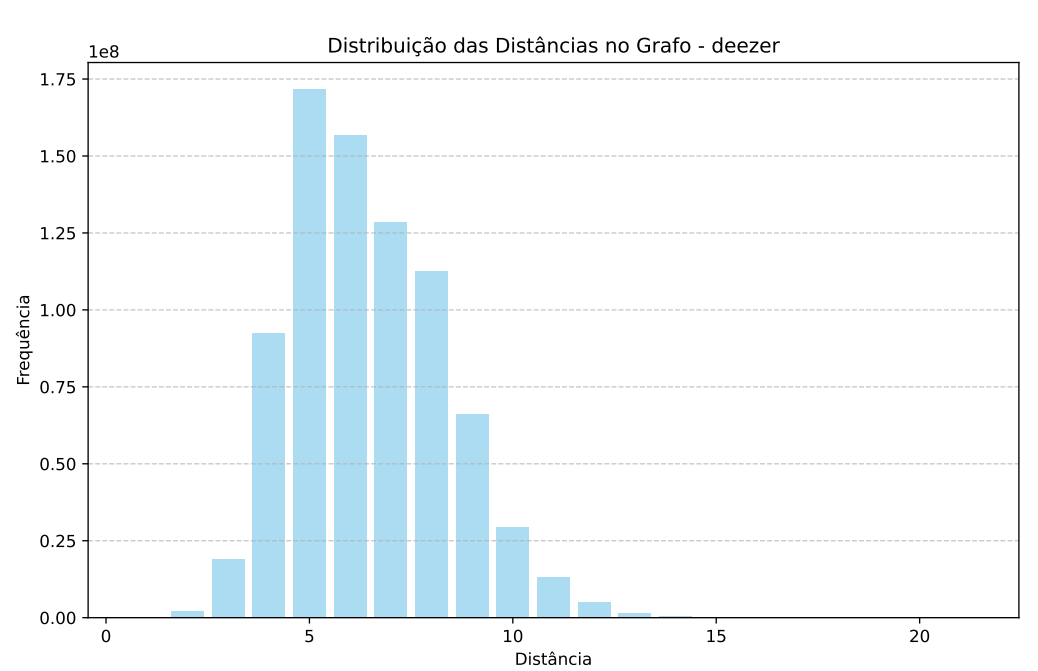

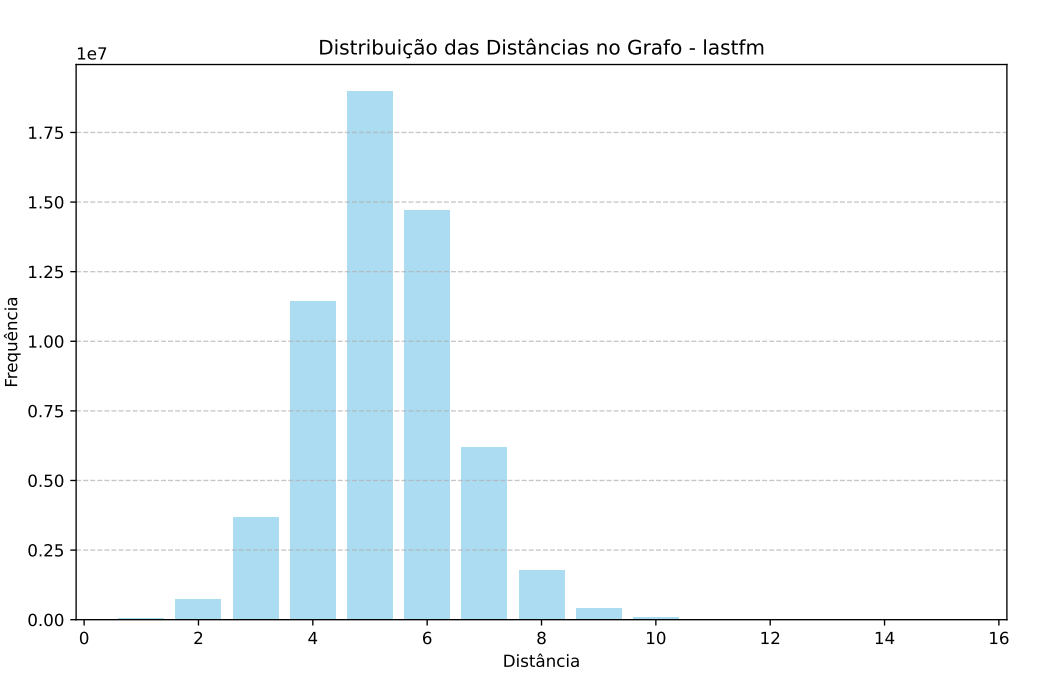

Distância média - deezer: 6.4498

Distância média - lastfm: 5.2322

In [ ]:
#f
import networkx as nx

deezer_bridges = list(nx.bridges(deezer_graph))
print(f"Total de pontes no grafo Deezer: {len(deezer_bridges)}")
print(f"Pontes no grafo Deezer: {deezer_bridges}")


lastfm_bridges = list(nx.bridges(lastfm_graph))
print(f"Total de pontes no grafo LastFM: {len(lastfm_bridges)}")
print(f"Pontes no grafo Deezer: {lastfm_bridges}")



Total de pontes no grafo Deezer: 6470
Pontes no grafo Deezer: [(3001, 27103), (1, 16675), (1, 22658), (1, 6133), (1, 20208), (1, 3153), (1, 11706), (1, 3290), (1, 3364), (1, 21365), (1, 16211), (1, 5789), (1, 23558), (1, 23019), (1, 21500), (1, 951), (1, 14220), (2514, 24328), (2514, 25511), (190, 25465), (2003, 50), (2003, 15502), (2003, 24898), (2003, 8042), (2003, 27889), (2003, 16710), (2003, 22447), (2003, 18028), (2003, 15859), (2003, 6187), (2003, 23025), (2003, 9817), (2003, 7697), (2003, 21591), (11290, 3688), (11290, 25861), (24836, 399), (24836, 1671), (24836, 3174), (24836, 5478), (24836, 9118), (24836, 10305), (24836, 12946), (24836, 14864), (24836, 21417), (24836, 21594), (24836, 21599), (24836, 22924), (24836, 24249), (24836, 25964), (18843, 7181), (18843, 14211), (18843, 27322), (10646, 532), (10646, 1503), (10646, 1829), (10646, 2795), (10646, 4059), (10646, 4903), (10646, 6027), (10646, 6114), (10646, 22615), (10646, 14081), (10646, 26018), (10646, 25671), (10646, 117

QUESTÃO 2

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Função para criar o grafo direcionado a partir do arquivo CSV
def create_directed_graph_from_csv(file_path):
    # Criar um grafo direcionado
    G = nx.DiGraph()

    # Ler o arquivo CSV sem cabeçalho, assumindo que as colunas A e B são as primeiras colunas
    df = pd.read_csv(file_path, header=None, encoding="utf-8", sep=' ')

    # Adicionar arestas ao grafo, utilizando as colunas A e B (índices 0 e 1)
    for _, row in df.iterrows():
        node1 = row[0]  # Coluna A (primeira coluna)
        node2 = row[1]  # Coluna B (segunda coluna)
        if pd.notnull(node1) and pd.notnull(node2):
            G.add_edge(node1, node2)

    return G

# Exemplo de uso
file_path = "scientometrics.csv"  # Substitua pelo caminho do arquivo CSV

# Criar o grafo direcionado
graph = create_directed_graph_from_csv(file_path)

In [ ]:
#a
print(f"Densidade do grafo: {nx.density(graph):.4f}")

Densidade do grafo: 0.0022


In [ ]:
#b

# Função para calcular o grau de entrada e grau de saída médio
def calculate_average_degrees(graph):
    # Grau de entrada e grau de saída de todos os vértices
    in_degrees = [deg for node, deg in graph.in_degree()]
    out_degrees = [deg for node, deg in graph.out_degree()]

    # Calcular o grau médio de entrada e saída
    avg_in_degree = sum(in_degrees) / len(in_degrees) if in_degrees else 0
    avg_out_degree = sum(out_degrees) / len(out_degrees) if out_degrees else 0

    return avg_in_degree, avg_out_degree



# Calcular os graus médios de entrada e saída
avg_in_degree, avg_out_degree = calculate_average_degrees(graph)

# Exibir os resultados
print(f"Grau de Entrada Médio: {avg_in_degree:.2f}")
print(f"Grau de Saída Médio: {avg_out_degree:.2f}")


Grau de Entrada Médio: 3.01
Grau de Saída Médio: 3.01


In [ ]:
# c

# Função para contar componentes conexos fracos e fortes
def count_connected_components(graph):
    # Para conectividade fraca, ignoramos a direção das arestas
    weakly_connected_components = list(nx.weakly_connected_components(graph))
    num_weakly_connected = len(weakly_connected_components)

    # Para conectividade forte
    strongly_connected_components = list(nx.strongly_connected_components(graph))
    num_strongly_connected = len(strongly_connected_components)

    return num_weakly_connected, num_strongly_connected, weakly_connected_components, strongly_connected_components



# Contar componentes conexos fracos e fortes
num_weakly_connected, num_strongly_connected, weakly_components, strongly_components = count_connected_components(graph)

# Exibir resultados
print(f"Número de componentes fracos conectados: {num_weakly_connected}")
print(f"Número de componentes fortemente conectados: {num_strongly_connected}")

# Opcional: Mostrar componentes específicos
print("\nComponentes fracos conectados:", weakly_components)
print("\nComponentes fortemente conectados:", strongly_components)

Número de componentes fracos conectados: 16
Número de componentes fortemente conectados: 1369

Componentes fracos conectados: [{1, 2, 3, 6, 8, 9, 10, 12, 13, 14, 17, 18, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32, 34, 35, 36, 37, 38, 39, 42, 46, 47, 48, 49, 51, 52, 53, 57, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 122, 123, 125, 126, 127, 129, 131, 132, 133, 134, 135, 136, 137, 140, 143, 144, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 205, 207, 208, 212, 214, 215, 216, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 231, 232, 233, 234, 235, 239, 240, 241, 243, 244, 247, 2

In [ ]:
# d

# Função para identificar ciclos no grafo
def find_cycles(graph):
    cycles = list(nx.simple_cycles(graph))  # Detecta todos os ciclos simples
    return cycles


# Encontrar ciclos
cycles = find_cycles(graph)

# Exibir os ciclos encontrados
if cycles:
    print(f"Ciclos encontrados: {cycles}")
else:
    print("Nenhum ciclo encontrado no grafo.")

# Calcular a média do comprimento dos caminhos mais curtos
shortest_path_lengths = dict(nx.all_pairs_dijkstra_path_length(graph))
total_distance = 0
pairs = 0

for u, distances in shortest_path_lengths.items():
    for v, distance in distances.items():
        if u != v:
            total_distance += distance
            pairs += 1


avg_path_length = total_distance / pairs

# Exibir o resultado
print(f"Média: {avg_path_length:.2f}")


Ciclos encontrados: [[1248, 1247], [976, 975]]
Média: 3.95


In [ ]:
#e

# Função para calcular a centralidade de grau
def degree_centrality(graph):
    # Calcula o grau de entrada e saída para cada vértice
    in_degrees = dict(graph.in_degree())  # Grau de entrada
    out_degrees = dict(graph.out_degree())  # Grau de saída

    centrality = {}

    # Calcular a centralidade de grau
    for node in graph.nodes():
        centrality[node] = in_degrees[node] + out_degrees[node]

    return centrality

# Função para exibir a centralidade de grau
def display_degree_centrality(centrality):
    # Exibir os vértices e suas centralidades de grau
    sorted_centrality = sorted(centrality.items(), key=lambda item: item[1], reverse=True)

    print("Vértices ordenados por centralidade de grau (do maior para o menor):")
    for node, centrality_value in sorted_centrality:
        print(f"{node}: {centrality_value}")

    # Retornar o dicionário ordenado de centralidade de grau
    return sorted_centrality

# Calcular a centralidade de grau
centrality = degree_centrality(graph)

# Exibir os resultados
sorted_centrality = display_degree_centrality(centrality)


Vértices ordenados por centralidade de grau (do maior para o menor):
1480: 158
412: 76
218: 61
308: 43
466: 39
177: 35
836: 34
329: 33
192: 31
6: 29
698: 29
904: 29
169: 27
554: 25
696: 25
1377: 25
946: 24
1520: 24
325: 23
1236: 23
10: 22
705: 22
1153: 22
1281: 22
1336: 21
23: 20
84: 20
359: 20
400: 20
830: 20
1091: 20
1645: 20
17: 19
79: 19
88: 19
144: 19
196: 19
232: 19
364: 19
733: 19
918: 19
1080: 19
1082: 19
1120: 19
167: 18
247: 18
322: 18
362: 18
651: 18
779: 18
1023: 18
1266: 18
1389: 18
241: 17
384: 17
401: 17
594: 17
604: 17
667: 17
681: 17
789: 17
1175: 17
1229: 17
1333: 17
106: 16
261: 16
276: 16
340: 16
385: 16
397: 16
524: 16
568: 16
680: 16
732: 16
849: 16
960: 16
998: 16
1317: 16
201: 15
234: 15
348: 15
527: 15
670: 15
671: 15
1092: 15
1149: 15
1257: 15
1485: 15
28: 14
272: 14
395: 14
517: 14
648: 14
688: 14
691: 14
729: 14
823: 14
838: 14
762: 14
916: 14
950: 14
1022: 14
1122: 14
1221: 14
1278: 14
1406: 14
1454: 14
1550: 14
12: 13
154: 13
185: 13
176: 13
584: 13
616: 1